In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

dataset = pd.read_csv("UberDataset.csv")
dataset.fillna({"PURPOSE": "NOT"}, inplace=True)
dataset['START_DATE'] = pd.to_datetime(dataset['START_DATE'], errors='coerce')
dataset['END_DATE'] = pd.to_datetime(dataset['END_DATE'], errors='coerce')
dataset['date'] = dataset['START_DATE'].dt.date
dataset['time'] = dataset['START_DATE'].dt.hour
dataset['day-night'] = pd.cut(dataset['time'], bins=[0, 10, 15, 19, 24],
                              labels=['Morning', 'Afternoon', 'Evening', 'Night'])
dataset.dropna(inplace=True)
dataset.drop_duplicates(inplace=True)


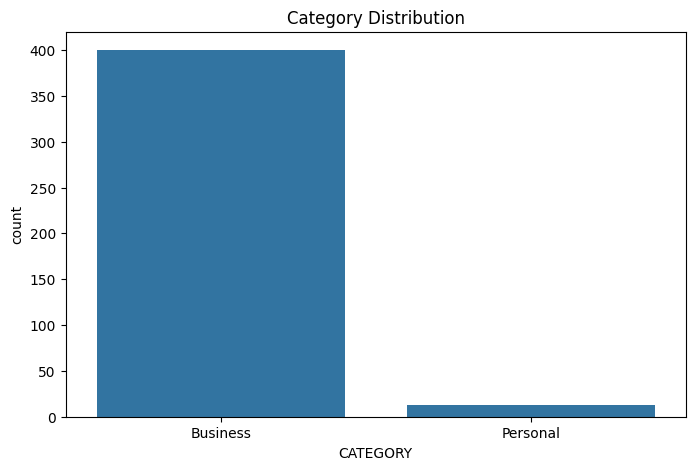

In [5]:
plt.figure(figsize=(8, 5))
sns.countplot(x='CATEGORY', data=dataset)
plt.title("Category Distribution")
plt.show()

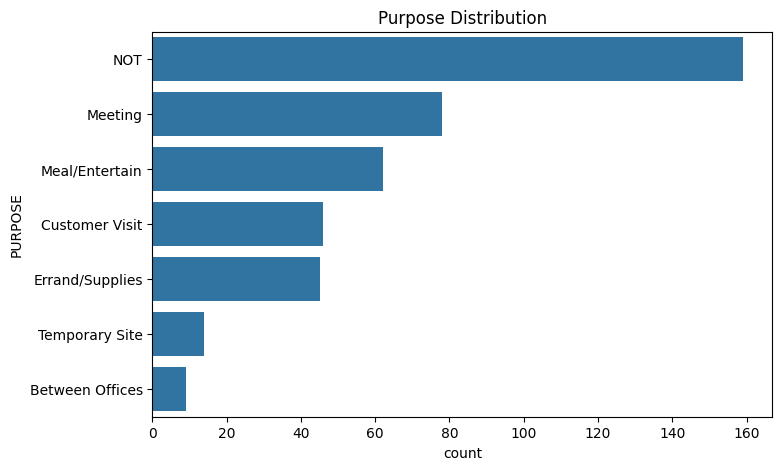

In [6]:
plt.figure(figsize=(8, 5))
sns.countplot(y='PURPOSE', data=dataset, order=dataset['PURPOSE'].value_counts().index)
plt.title("Purpose Distribution")
plt.show()

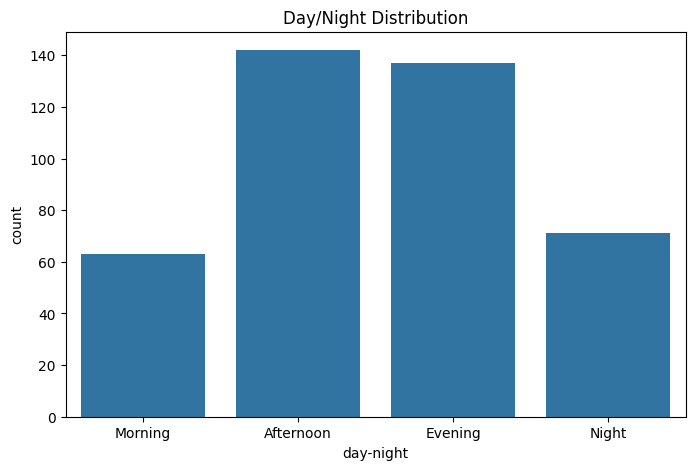

In [7]:
plt.figure(figsize=(8, 5))
sns.countplot(x='day-night', data=dataset)
plt.title("Day/Night Distribution")
plt.show()

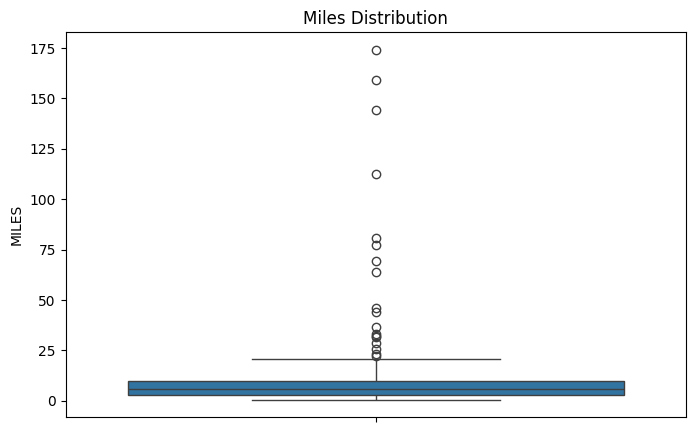

In [8]:
plt.figure(figsize=(8, 5))
sns.boxplot(dataset['MILES'])
plt.title("Miles Distribution")
plt.show()

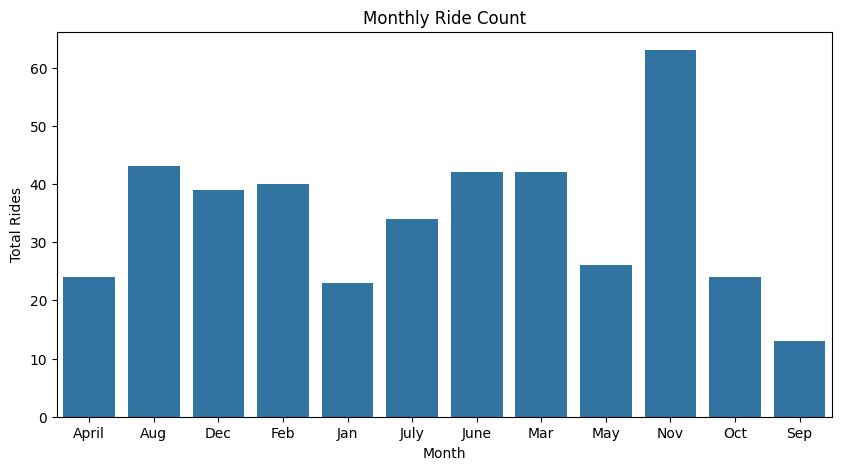

In [11]:
dataset['MONTH'] = dataset['START_DATE'].dt.month.map({1:'Jan',2:'Feb',3:'Mar',4:'April',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
month_counts = dataset['MONTH'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
sns.barplot(x=month_counts.index, y=month_counts.values)
plt.title("Monthly Ride Count")
plt.xlabel("Month")
plt.ylabel("Total Rides")
plt.show()


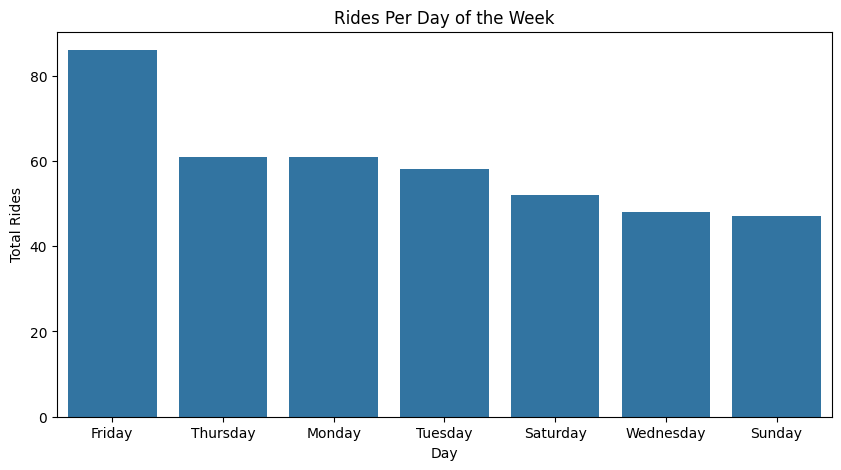

In [10]:
dataset['DAY'] = dataset['START_DATE'].dt.day_name()
day_counts = dataset['DAY'].value_counts()

plt.figure(figsize=(10, 5))
sns.barplot(x=day_counts.index, y=day_counts.values)
plt.title("Rides Per Day of the Week")
plt.xlabel("Day")
plt.ylabel("Total Rides")
plt.show()

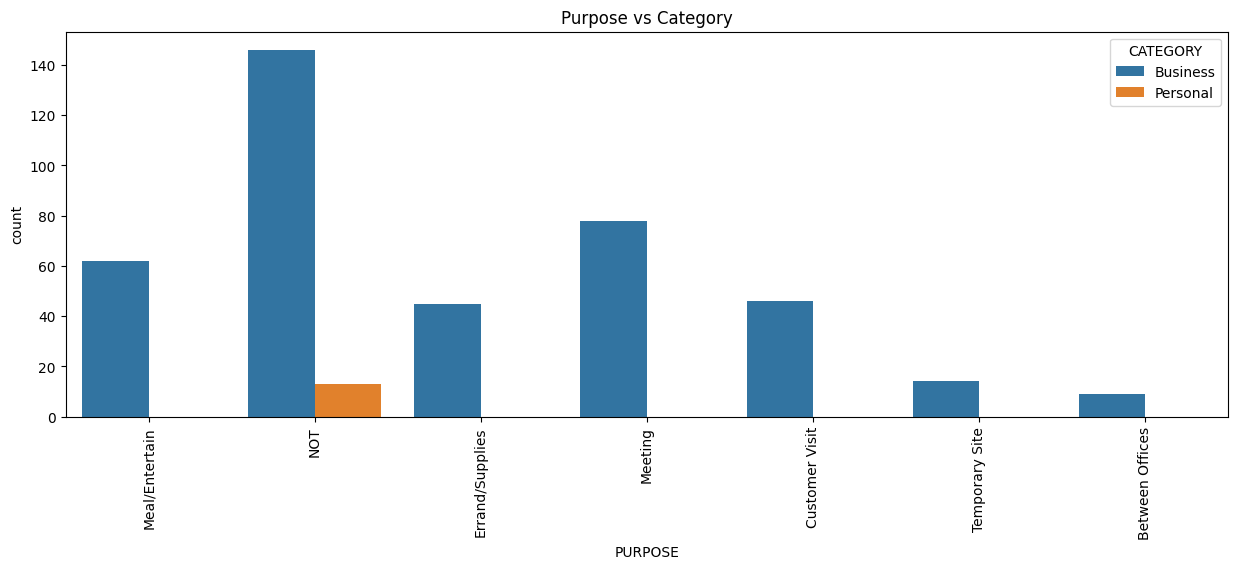

In [12]:
plt.figure(figsize=(15, 5))
sns.countplot(data=dataset, x='PURPOSE', hue='CATEGORY')
plt.title("Purpose vs Category")
plt.xticks(rotation=90)
plt.show()

<ipython-input-13-a5d15d28b172>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[dataset['MILES'] < 40]['MILES'], kde=True, bins=30)


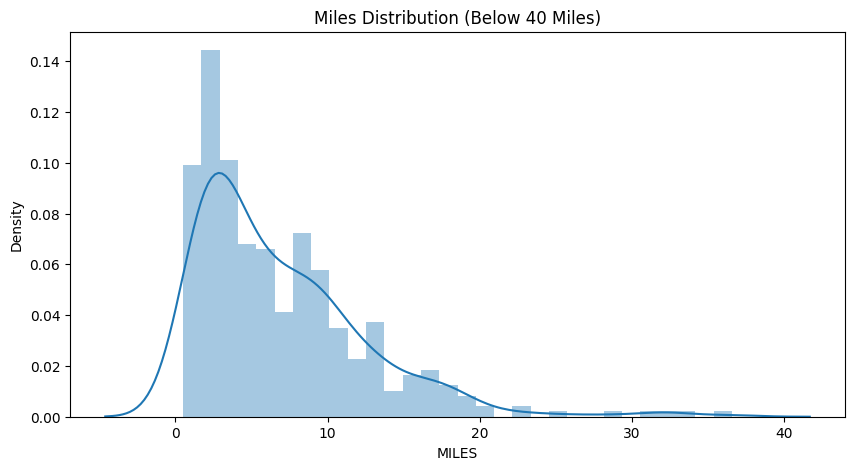

In [13]:
plt.figure(figsize=(10, 5))
sns.distplot(dataset[dataset['MILES'] < 40]['MILES'], kde=True, bins=30)
plt.title("Miles Distribution (Below 40 Miles)")
plt.show()

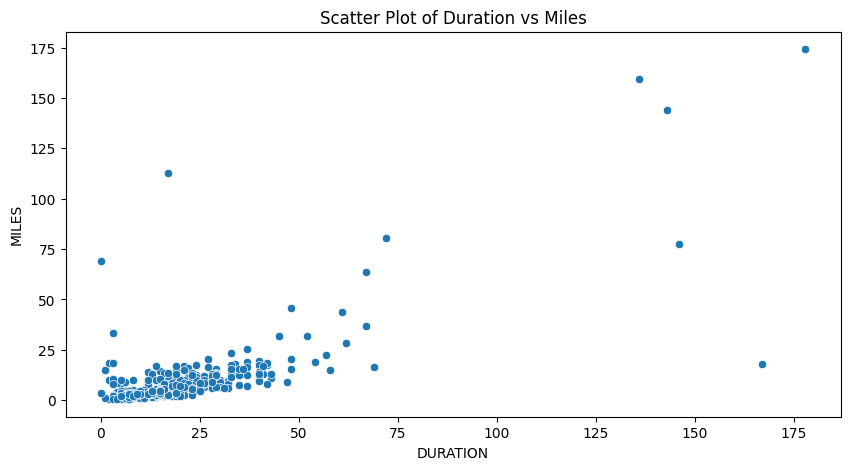

In [14]:
dataset['DURATION'] = (dataset['END_DATE'] - dataset['START_DATE']).dt.total_seconds()/60

plt.figure(figsize=(10, 5))
sns.scatterplot(x='DURATION', y='MILES', data=dataset)
plt.title("Scatter Plot of Duration vs Miles")
plt.show()


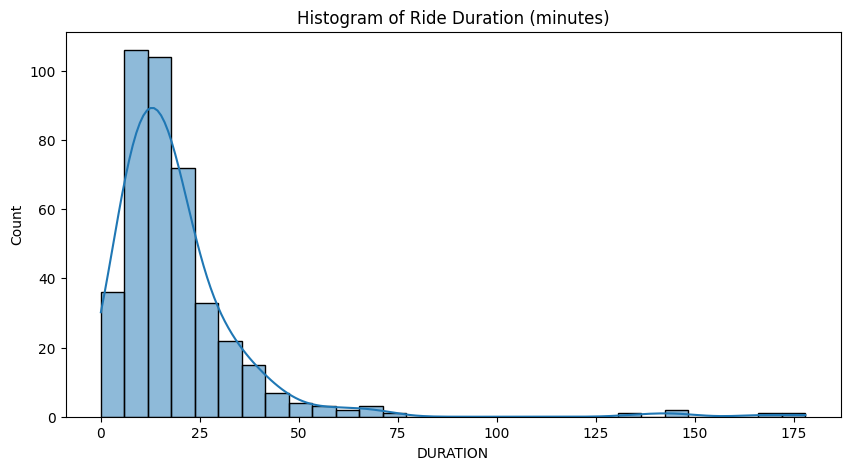

In [15]:
plt.figure(figsize=(10, 5))
sns.histplot(dataset['DURATION'], bins=30, kde=True)
plt.title("Histogram of Ride Duration (minutes)")
plt.show()


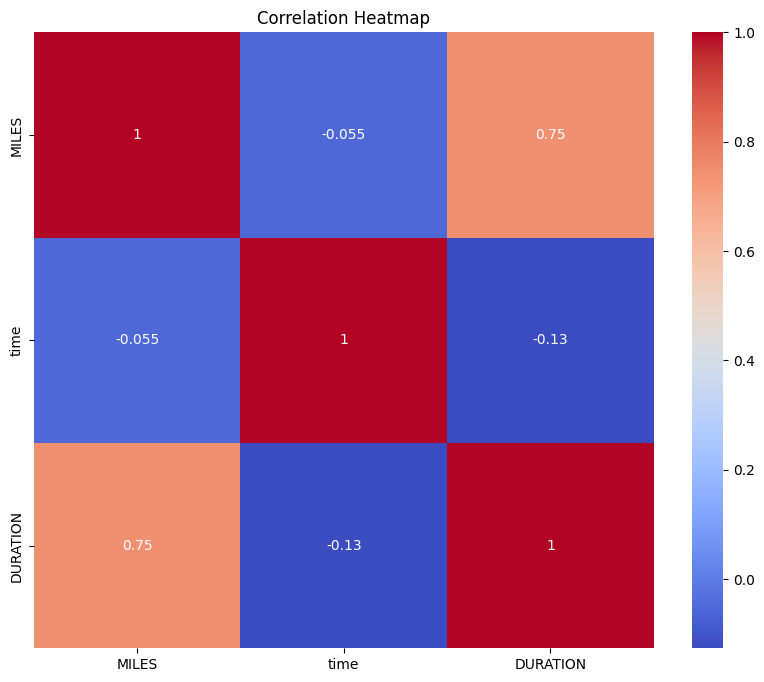

In [16]:
numeric_cols = dataset.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

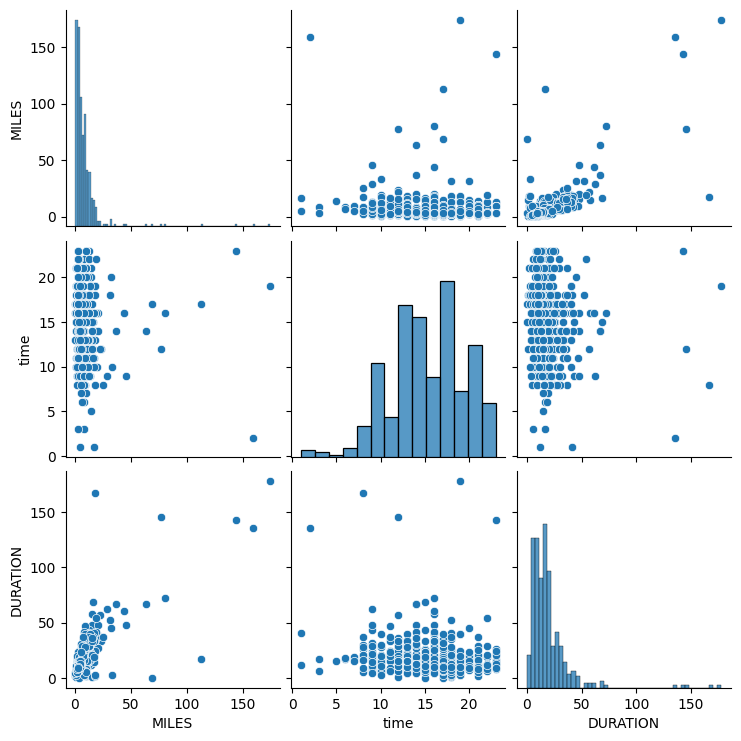

In [17]:
sns.pairplot(dataset[['MILES', 'time', 'DURATION']])
plt.show()

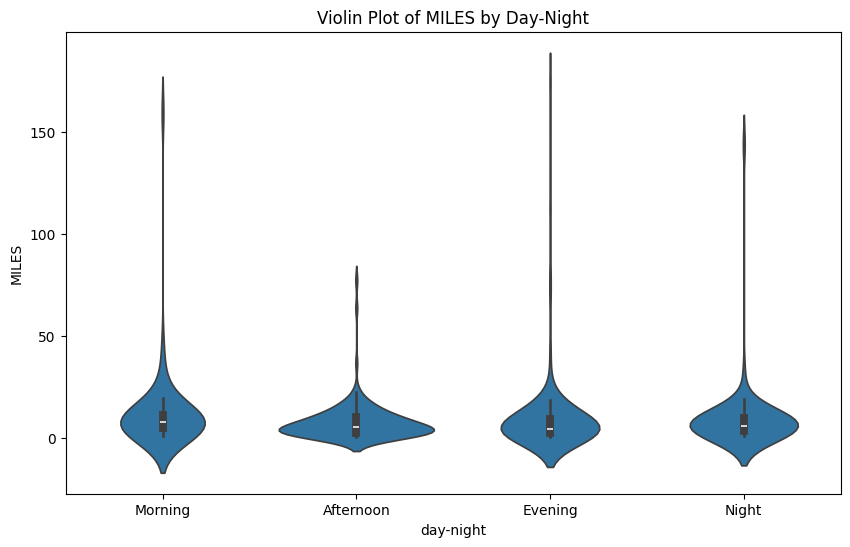

In [18]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='day-night', y='MILES', data=dataset)
plt.title("Violin Plot of MILES by Day-Night")
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 9.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 29.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


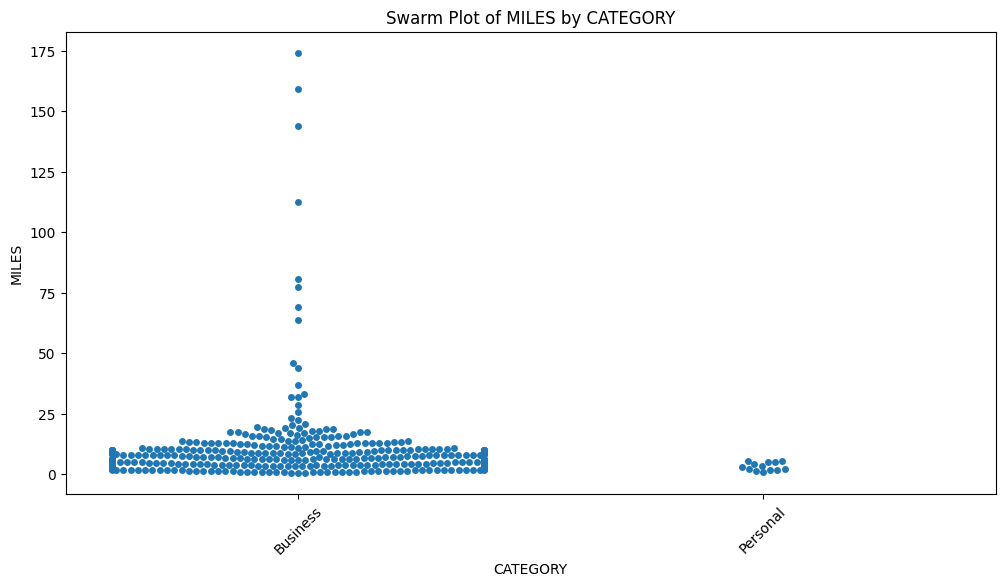

In [19]:
plt.figure(figsize=(12, 6))
sns.swarmplot(x='CATEGORY', y='MILES', data=dataset)
plt.title("Swarm Plot of MILES by CATEGORY")
plt.xticks(rotation=45)
plt.show()


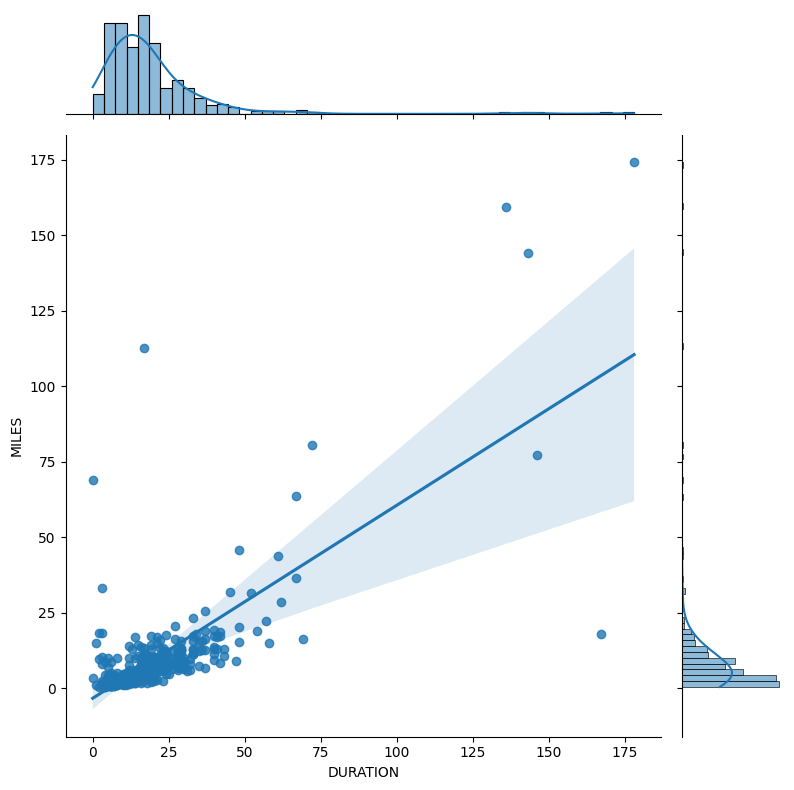

In [20]:
sns.jointplot(x='DURATION', y='MILES', data=dataset, kind='reg', height=8)
plt.show()

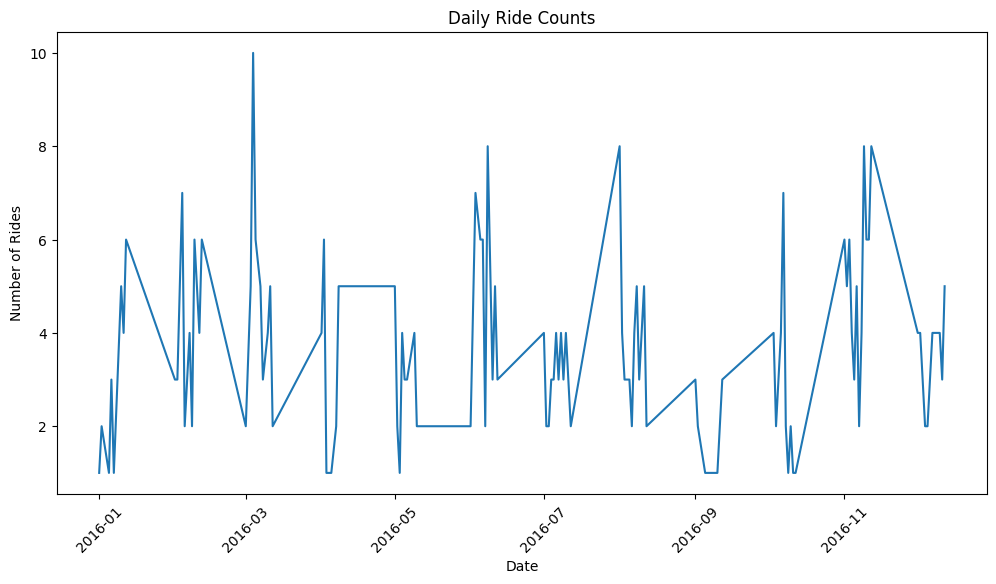

In [21]:
daily_counts = dataset['date'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x=daily_counts.index, y=daily_counts.values)
plt.title("Daily Ride Counts")
plt.xlabel("Date")
plt.ylabel("Number of Rides")
plt.xticks(rotation=45)
plt.show()


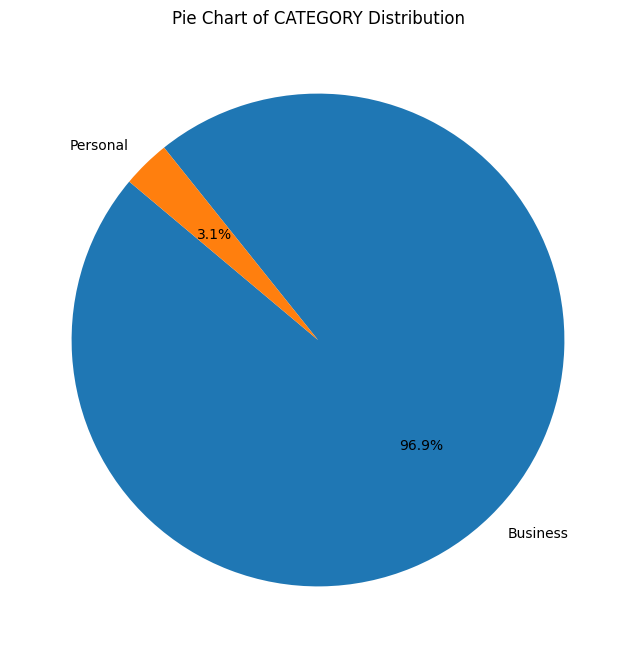

In [22]:
category_counts = dataset['CATEGORY'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Pie Chart of CATEGORY Distribution")
plt.show()


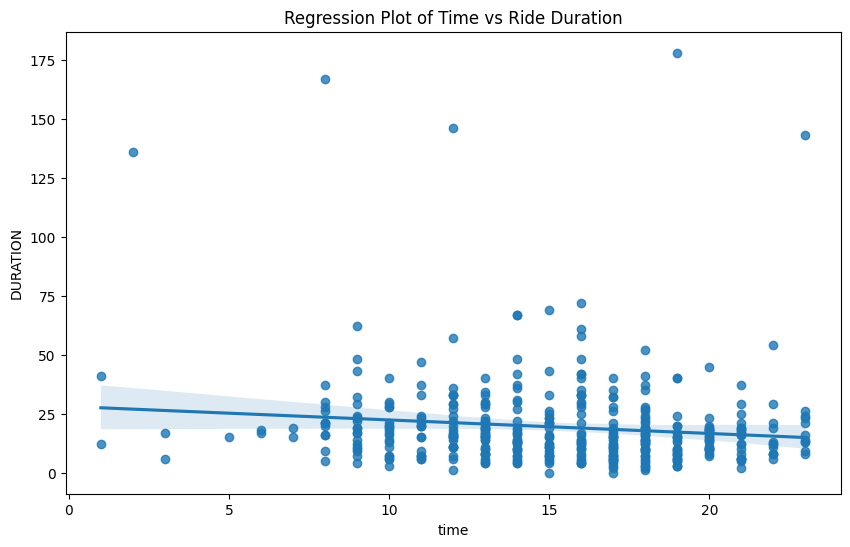

In [24]:
plt.figure(figsize=(10, 6))
sns.regplot(x='time', y='DURATION', data=dataset)
plt.title("Regression Plot of Time vs Ride Duration")
plt.show()
